In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

<h1>Importation des données:</h1>

In [2]:
### Simulation de données en 2D séparables linéairement
#heartData = pd.read_csv('heart_statlog.csv')
heartData = pd.read_csv('HeartData.csv', header= None)
# Renommage des colonnes 
heartData.columns = ['age', 'sex', 'chest_pain', 'blood_press', 
                     'serum_chol', 'blood_sugar', 'electrocard', 
                     'max_heart_rate', 'induced_ang', 'oldpeak', 
                     'peak_st_seg', 'major_ves', 'thal', 'presence']

# Decoupage de dataset pour les features et label
x = heartData.drop('presence', axis=1)
y = heartData['presence'].copy()

heartData.head(3)

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


<h1>Découpage et normalization des données:</h1>

In [3]:
from sklearn.model_selection import train_test_split  
# Split des données à entrainer et à tester
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, shuffle=False,random_state=0)  


In [4]:
from sklearn.preprocessing import StandardScaler    
# Normalisation des données avec meanScaler(StandardScaler)
meanS_x= StandardScaler()    
x_train= meanS_x.fit_transform(x_train)  
x_test= meanS_x.transform(x_test)  

<h1>Hyper parametrage avec Kernel= RBF:</h1>

In [5]:
#avec Kernel rbf
C_2d_range =  [1.e+0, 1.e+1, 1.e+2, 1.e+3, 1.e+4]#np.logspace(0, 4, 5)
gamma_2d_range =  [ 0.01,  0.1 ,  1  , 10 ]
classifiers = []

for C in C_2d_range:
    for gamma in gamma_2d_range:
        classifier = SVC(kernel='rbf',C=C, gamma=gamma,class_weight='balanced')
        classifier.fit(x_train, y_train)
        print("La valeur de parametre C =", C,"avec La valeur de parametre gamma =",gamma , " donnent Le score : ",classifier.score(x_train, y_train))

La valeur de parametre C = 1.0 avec La valeur de parametre gamma = 0.01  donnent Le score :  0.8564356435643564
La valeur de parametre C = 1.0 avec La valeur de parametre gamma = 0.1  donnent Le score :  0.9356435643564357
La valeur de parametre C = 1.0 avec La valeur de parametre gamma = 1  donnent Le score :  1.0
La valeur de parametre C = 1.0 avec La valeur de parametre gamma = 10  donnent Le score :  1.0
La valeur de parametre C = 10.0 avec La valeur de parametre gamma = 0.01  donnent Le score :  0.8960396039603961
La valeur de parametre C = 10.0 avec La valeur de parametre gamma = 0.1  donnent Le score :  0.995049504950495
La valeur de parametre C = 10.0 avec La valeur de parametre gamma = 1  donnent Le score :  1.0
La valeur de parametre C = 10.0 avec La valeur de parametre gamma = 10  donnent Le score :  1.0
La valeur de parametre C = 100.0 avec La valeur de parametre gamma = 0.01  donnent Le score :  0.9504950495049505
La valeur de parametre C = 100.0 avec La valeur de parametr

tn : 37  fp : 1  fn:  23  tp : 7
              precision    recall  f1-score   support

           1       0.62      0.97      0.76        38
           2       0.88      0.23      0.37        30

    accuracy                           0.65        68
   macro avg       0.75      0.60      0.56        68
weighted avg       0.73      0.65      0.58        68

Le taux d'erreur est :  0.35294117647058826
Confusion matrix
[[37  1]
 [23  7]]


<AxesSubplot:>

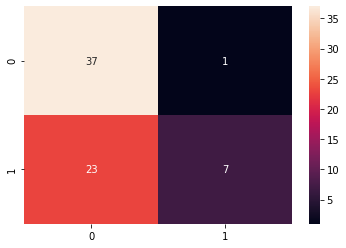

In [6]:
# Kernel RBF
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns 

classifier = SVC(kernel='rbf',C=1.0, gamma=1.0)
Xfit=classifier.fit(x_train,y_train)
y_pred = Xfit.predict(x_test)
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(y_test, y_pred))
#il doit etre 5 fois plus couteux de pr´edire une absence d’attaque cardiaque lorsqu’en r´ealit´e cette attaque cardiaque a lieu
print("Le taux d'erreur est : ",(fp+fn)/(fn+fp+tp+tn))

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)


<h1>Hyper parametrage avec Kernel= POLY:</h1>

In [ ]:
C_2d_range =  [1.e+0, 1.e+1, 1.e+2, 1.e+3, 1.e+4]
degrees =  [1,2,3,4,5,6,7]
classifiers = []
for C in C_2d_range:
    for degre in degrees:
        clf = SVC(kernel='poly',C=C, degree=degre,class_weight='balanced')
        clf.fit(x_train, y_train)
        print("La valeur de parametre C =", C," avec la valeur de degre est =",degre , "donnent le score = ",clf.score(x_train, y_train))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

clf = SVC(kernel='poly',C=100.0, degree=3.0)
Xfit=clf.fit(x_train,y_train)
y_pred = Xfit.predict(x_test)
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(y_test, y_pred))

#il doit etre 5 fois plus coˆuteux de pr´edire une absence d’attaque cardiaque lorsqu’en r´ealit´e cette attaque cardiaque a lieu
print("Le taux d'erreur est : ",(fp+fn)/(tn+tp+fn+fp))

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
